In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-46.55750473973032, -65.58992755480419),
 (59.12891898168499, 76.20176076949383),
 (31.70113650454273, -33.51875485098509),
 (-34.261585567408176, 55.55226262432532),
 (-11.601104008609951, 173.56264879667106),
 (18.078244490917143, 4.719987291021766),
 (-11.590045630483104, -68.18263168529286),
 (33.22361704617538, 103.8891687818599),
 (-83.69287459375644, 125.12794495043704),
 (-69.52347685175724, 51.78564163764358),
 (-5.294556830639962, 80.80487311280922),
 (20.010759744392487, 131.64891925496363),
 (-86.14888495419687, 153.1929387909189),
 (33.02346764037566, 11.662407074850961),
 (89.46116270426336, 20.408489040361644),
 (-68.85030798242366, -111.34861460669158),
 (-59.91831242283149, 106.04127830137031),
 (55.397227076917204, 144.8454440844543),
 (89.16498595822463, -125.79238963273701),
 (42.488975684487315, -167.90088457294164),
 (30.509272929263503, 92.9918161738837),
 (57.11011347481809, -48.85429820055924),
 (-46.56447950824654, -98.96755379922735),
 (-41.57658036211881, 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 13 | comodoro rivadavia
Processing Record 2 of Set 13 | nizhnevartovsk
Processing Record 3 of Set 13 | ribeira grande
Processing Record 4 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 13 | sola
Processing Record 6 of Set 13 | arlit
Processing Record 7 of Set 13 | cobija
Processing Record 8 of Set 13 | jiangyou
Processing Record 9 of Set 13 | new norfolk
Processing Record 10 of Set 13 | east london
Processing Record 11 of Set 13 | hithadhoo
Processing Record 12 of Set 13 | itoman
Processing Record 13 of Set 13 | bluff
Processing Record 14 of Set 13 | zaltan
Processing Record 15 of Set 13 | longyearbyen
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | okha
Processing Record 19 of Set 13 | tuktoyaktuk
Processing Record 20 of Set 13 | bethel
Processing Record 21 of Set 13 | lasa
Processing Record 22 of Set 13 | qaqortoq
Processing Record 23 of Set 13 | castro
Proc

Processing Record 38 of Set 16 | kajaani
Processing Record 39 of Set 16 | aflu
City not found. Skipping...
Processing Record 40 of Set 16 | namatanai
Processing Record 41 of Set 16 | westport
Processing Record 42 of Set 16 | north platte
Processing Record 43 of Set 16 | khonuu
City not found. Skipping...
Processing Record 44 of Set 16 | shingu
Processing Record 45 of Set 16 | adrar
Processing Record 46 of Set 16 | bereda
Processing Record 47 of Set 16 | oktyabrskiy
Processing Record 48 of Set 16 | dzerzhinsk
Processing Record 49 of Set 16 | aleksandrovsk-sakhalinskiy
Processing Record 50 of Set 16 | luena
Processing Record 1 of Set 17 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 17 | laerdalsoyri
Processing Record 3 of Set 17 | skibbereen
Processing Record 4 of Set 17 | saleaula
City not found. Skipping...
Processing Record 5 of Set 17 | merauke
Processing Record 6 of Set 17 | tarko-sale
Processing Record 7 of Set 17 | gardan diwal
City not found. Skipping...
Pro

Processing Record 19 of Set 20 | bardiyah
Processing Record 20 of Set 20 | maniitsoq
Processing Record 21 of Set 20 | san carlos del zulia
Processing Record 22 of Set 20 | ulladulla
Processing Record 23 of Set 20 | padang
Processing Record 24 of Set 20 | urdzhar
City not found. Skipping...
Processing Record 25 of Set 20 | encruzilhada do sul
Processing Record 26 of Set 20 | addis abeba
Processing Record 27 of Set 20 | xining
Processing Record 28 of Set 20 | paytug
City not found. Skipping...
Processing Record 29 of Set 20 | lithakia
Processing Record 30 of Set 20 | tilhar
Processing Record 31 of Set 20 | aitape
Processing Record 32 of Set 20 | souillac
Processing Record 33 of Set 20 | katobu
Processing Record 34 of Set 20 | freeport
Processing Record 35 of Set 20 | prince rupert
Processing Record 36 of Set 20 | atasu
Processing Record 37 of Set 20 | batemans bay
Processing Record 38 of Set 20 | ugoofaaru
Processing Record 39 of Set 20 | black river
Processing Record 40 of Set 20 | lito

Processing Record 5 of Set 24 | mohacs
Processing Record 6 of Set 24 | jimma
Processing Record 7 of Set 24 | ituango
Processing Record 8 of Set 24 | kimbe
Processing Record 9 of Set 24 | luau
Processing Record 10 of Set 24 | leo
Processing Record 11 of Set 24 | sar-e pul
Processing Record 12 of Set 24 | xuddur
Processing Record 13 of Set 24 | vitim
Processing Record 14 of Set 24 | poronaysk
Processing Record 15 of Set 24 | charyshskoye
Processing Record 16 of Set 24 | kasongo-lunda
Processing Record 17 of Set 24 | ko samui
Processing Record 18 of Set 24 | medea
Processing Record 19 of Set 24 | vondrozo
Processing Record 20 of Set 24 | alyangula
Processing Record 21 of Set 24 | mogocha
Processing Record 22 of Set 24 | chapais
Processing Record 23 of Set 24 | saint-georges
Processing Record 24 of Set 24 | pocri
Processing Record 25 of Set 24 | diu
Processing Record 26 of Set 24 | jalu
Processing Record 27 of Set 24 | yar-sale
Processing Record 28 of Set 24 | skwierzyna
Processing Record 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Comodoro Rivadavia,-45.8667,-67.5000,52.07,34,5,25.86,AR,2021-07-30 19:03:28
1,Nizhnevartovsk,60.9344,76.5531,50.02,87,0,6.71,RU,2021-07-30 19:06:15
2,Ribeira Grande,38.5167,-28.7000,77.40,73,20,12.66,PT,2021-07-30 19:06:15
3,Sola,-13.8833,167.5500,78.08,79,82,15.48,VU,2021-07-30 19:06:16
4,Arlit,18.7369,7.3853,104.65,12,8,3.85,NE,2021-07-30 19:06:16
5,Cobija,-11.0267,-68.7692,84.92,21,0,3.47,BO,2021-07-30 19:03:55
6,Jiangyou,31.7667,104.7167,75.45,81,89,4.32,CN,2021-07-30 19:06:17
7,New Norfolk,-42.7826,147.0587,53.92,64,89,9.10,AU,2021-07-30 19:06:17
8,East London,-33.0153,27.9116,60.24,72,12,6.42,ZA,2021-07-30 19:06:18
9,Hithadhoo,-0.6000,73.0833,81.73,75,70,5.01,MV,2021-07-30 19:06:18


In [12]:
city_data_reordered = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']  
city_data_df = city_data_df[city_data_reordered] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2021-07-30 19:03:28,-45.8667,-67.5000,52.07,34,5,25.86
1,Nizhnevartovsk,RU,2021-07-30 19:06:15,60.9344,76.5531,50.02,87,0,6.71
2,Ribeira Grande,PT,2021-07-30 19:06:15,38.5167,-28.7000,77.40,73,20,12.66
3,Sola,VU,2021-07-30 19:06:16,-13.8833,167.5500,78.08,79,82,15.48
4,Arlit,NE,2021-07-30 19:06:16,18.7369,7.3853,104.65,12,8,3.85
5,Cobija,BO,2021-07-30 19:03:55,-11.0267,-68.7692,84.92,21,0,3.47
6,Jiangyou,CN,2021-07-30 19:06:17,31.7667,104.7167,75.45,81,89,4.32
7,New Norfolk,AU,2021-07-30 19:06:17,-42.7826,147.0587,53.92,64,89,9.10
8,East London,ZA,2021-07-30 19:06:18,-33.0153,27.9116,60.24,72,12,6.42
9,Hithadhoo,MV,2021-07-30 19:06:18,-0.6000,73.0833,81.73,75,70,5.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

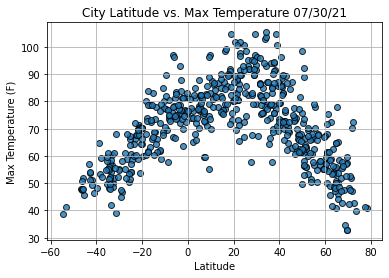

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

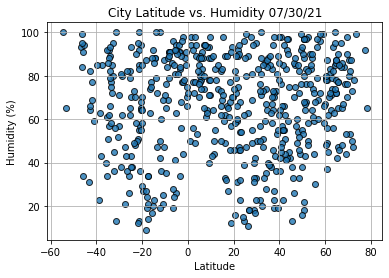

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

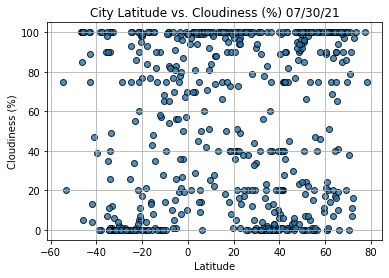

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

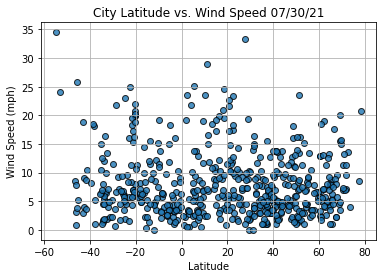

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()